# Предобработка данных

In [27]:
#  Активируем библиотеки

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

import os

In [2]:
# Прочитаем данные

columns=['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','country','salary']
adult = pd.read_csv('adult.data', sep=',', decimal=",", header = None, names = columns)
adult

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
adult = adult.drop(['education'], axis=1)

In [4]:
adult.dtypes

age                int64
workclass         object
fnlwgt             int64
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
country           object
salary            object
dtype: object

Видно, что много переменных имею тип object. Сделаем их количественными с помощью функции .fit_transform из библиотеки sklearn

In [5]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

adult['workclass'] = labelencoder.fit_transform(adult['workclass'])
adult['marital_status'] = labelencoder.fit_transform(adult['marital_status'])
adult['occupation'] = labelencoder.fit_transform(adult['occupation'])
adult['relationship'] = labelencoder.fit_transform(adult['relationship'])
adult['race'] = labelencoder.fit_transform(adult['race'])
adult['sex'] = labelencoder.fit_transform(adult['sex'])
adult['country'] = labelencoder.fit_transform(adult['country'])
adult['salary'] = labelencoder.fit_transform(adult['salary'])

adult

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,salary
0,39,7,77516,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,13,2,10,5,2,0,0,0,40,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,12,2,13,5,4,0,0,0,38,39,0
32557,40,4,154374,9,2,7,0,4,1,0,0,40,39,1
32558,58,4,151910,9,6,1,4,4,0,0,0,40,39,0
32559,22,4,201490,9,4,1,3,4,1,0,0,20,39,0


In [6]:
# Посмотрим, есть ли null-значения

adult.isnull().sum()

age               0
workclass         0
fnlwgt            0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
country           0
salary            0
dtype: int64

In [8]:
# Рассмотрим статистические характеристики столбцов.

adult.describe()

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,salary
count,32561.000000,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,3.868892,1.897784e+05,10.080679,2.611836,6.572740,1.446362,3.665858,0.669205,1077.648844,87.303830,40.437456,36.718866,0.240810
std,13.640433,1.455960,1.055500e+05,2.572720,1.506222,4.228857,1.606771,0.848806,0.470506,7385.292085,402.960219,12.347429,7.823782,0.427581
min,17.000000,0.000000,1.228500e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178270e+05,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783560e+05,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.370510e+05,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


Уже по таблице видно, что параметры capital-gain и capital-loss имеют выбросы.

/Users/natalaantonenko/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='capital_loss', ylabel='count'>

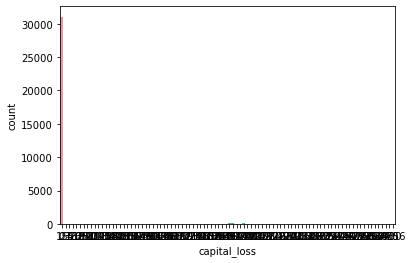

In [9]:
sns.countplot(adult['capital_loss'])

/Users/natalaantonenko/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='capital_gain', ylabel='count'>

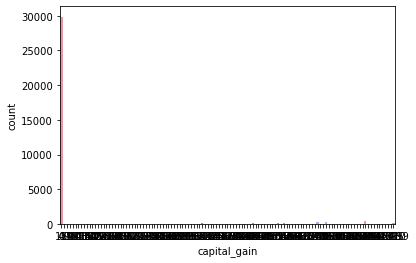

In [10]:
sns.countplot(adult['capital_gain'])

In [11]:
# При анализе рассмотрим модели, обученные на данных параметрами capital_gain и capital_loss (adult) 
# и без них (adult_2).
adult_2 = adult.drop(['capital_gain','capital_loss'], axis=1)

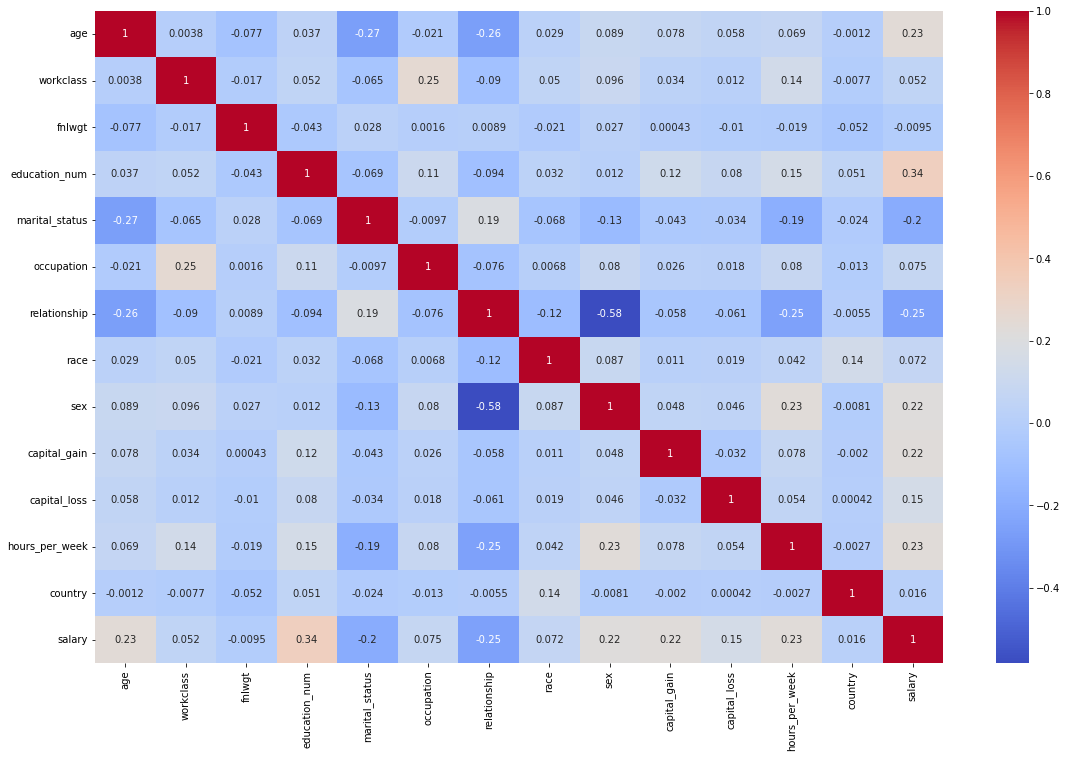

In [12]:
# Рассмотрим корреляционную матрицу.

rs = np.random.RandomState(0)
df = pd.DataFrame(adult)
corr = df.corr()
plt.figure(figsize=(19, 12))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

Нет ни одной пары параметров, с коэффициентом корелляции, большим чем 0.7. Значит оставляем все параметры.

In [13]:
X = adult.iloc[:, :-1].values
y = adult.iloc[:, 13].values

/Users/natalaantonenko/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

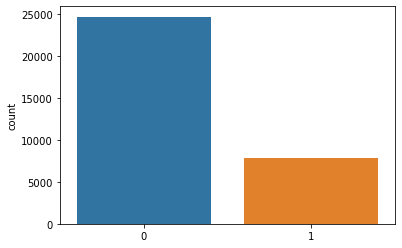

In [14]:
sns.countplot(y)

In [15]:
# Разобьем на тестовую и тренировочную выборки

from sklearn.model_selection import train_test_split  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 1234)  

In [16]:
print(len(X_train), ' ', len(X_test))

21815   10746


# KNN-classifier

In [17]:
#  Проведем стандартизацию предикторов

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_2 = scaler.transform(X_train)  
X_test_2 = scaler.transform(X_test) 

In [18]:
from sklearn.neighbors import KNeighborsClassifier  

#  Определяем оптимальное число ближайших соседей
#  Число ближайших соседей меняем от 1 до 40
#  Каждый раз считаем accuracy (долю правильных распознаваний)
#  error - доля ошибок при разных к

error_rate = [-1]*40  

for i in range(1, 41):  
    knn_res = KNeighborsClassifier(n_neighbors=i)
    knn_res.fit(X_train_2, y_train)
    pred_i = knn_res.predict(X_test_2)
    error_rate[i-1]= np.mean(pred_i != y_test)
    
print(np.round_(error_rate, 2))

[0.21 0.19 0.19 0.18 0.18 0.17 0.18 0.17 0.17 0.17 0.17 0.17 0.17 0.17
 0.17 0.17 0.17 0.17 0.17 0.17 0.17 0.17 0.17 0.17 0.17 0.17 0.17 0.17
 0.17 0.17 0.17 0.17 0.17 0.17 0.17 0.17 0.17 0.17 0.17 0.17]


Text(0, 0.5, 'Доля ошибок')

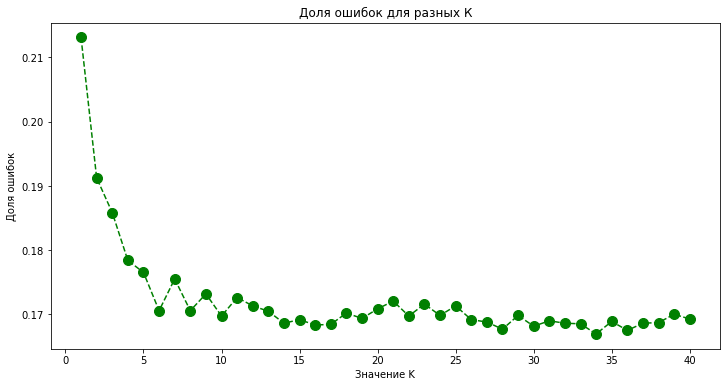

In [19]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 41), error_rate, color='green', linestyle='dashed', marker='o',  
         markerfacecolor='green', markersize=10)

plt.title(u'Доля ошибок для разных К')  
plt.xlabel(u'Значение K')  
plt.ylabel(u'Доля ошибок')

In [20]:
#  Построение классификатора

knn = KNeighborsClassifier(n_neighbors=6,       
        metric='minkowski')  
knn.fit(X_train_2, y_train)    

KNeighborsClassifier(n_neighbors=6)

In [21]:
y_pred_train = knn.predict(X_train_2)  
y_pred_test = knn.predict(X_test_2)  

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

conf_mat = confusion_matrix(y_test, y_pred_test)
conf_mat_test = pd.DataFrame(conf_mat, index=knn.classes_, columns=knn.classes_)

print(u'Таблица сопряженности для тестовой выборки')
print(conf_mat_test)  
print(' ')
print('Accuracy на тестовой выборке', accuracy_score(y_test, y_pred_test, normalize=True))
print(' ')
print(classification_report(y_test, y_pred_test))

Таблица сопряженности для тестовой выборки
      0     1
0  7654   574
1  1259  1259
 
Accuracy на тестовой выборке 0.8294249022892239
 
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      8228
           1       0.69      0.50      0.58      2518

    accuracy                           0.83     10746
   macro avg       0.77      0.72      0.74     10746
weighted avg       0.82      0.83      0.82     10746



In [23]:
conf_mat = confusion_matrix(y_train, y_pred_train)
conf_mat_train = pd.DataFrame(conf_mat, index=knn.classes_, columns=knn.classes_)

print(u'Таблица сопряженности для обучающей выборки')
print(conf_mat_train)  
print(' ')
print('Accuracy на обучающей выборке', accuracy_score(y_train, y_pred_train, normalize=True))
print(' ')
print(classification_report(y_train, y_pred_train)) 

Таблица сопряженности для обучающей выборки
       0     1
0  15835   657
1   2062  3261
 
Accuracy на обучающей выборке 0.8753609901443961
 
              precision    recall  f1-score   support

           0       0.88      0.96      0.92     16492
           1       0.83      0.61      0.71      5323

    accuracy                           0.88     21815
   macro avg       0.86      0.79      0.81     21815
weighted avg       0.87      0.88      0.87     21815



Рассмотрим датасет без выбросов. Так как параметры capital-gain и capital-loss без выбросов имеют нулевые столбцы - было принято решение убрать их из датасета.

In [24]:
X2 = adult_2.iloc[:, :-1].values
y2 = adult_2.iloc[:, 11].values

# Разбиваем на тестовую и тренировочную
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.33, random_state = 1234)  

# Стандартизация
scaler = StandardScaler()
scaler.fit(X_train2)

X_train_2_new = scaler.transform(X_train2)  
X_test_2_new = scaler.transform(X_test2) 

#  Построение классификатора
knn2 = KNeighborsClassifier(n_neighbors=6,       
        metric='minkowski')
# Обучение модели
knn2.fit(X_train_2_new, y_train2) 

# Предсказание
y_pred_train2 = knn2.predict(X_train_2_new)  
y_pred_test2 = knn2.predict(X_test_2_new) 

In [25]:
conf_mat = confusion_matrix(y_train2, y_pred_train2)
conf_mat_train = pd.DataFrame(conf_mat, index=knn2.classes_, columns=knn2.classes_)

print(u'Таблица сопряженности для обучающей выборки')
print(conf_mat_train)  
print(' ')
print('Accuracy на обучающей выборке', accuracy_score(y_train2, y_pred_train2, normalize=True))
print(' ')
print(classification_report(y_train2, y_pred_train2)) 


conf_mat = confusion_matrix(y_test2, y_pred_test2)
conf_mat_test = pd.DataFrame(conf_mat, index=knn2.classes_, columns=knn2.classes_)

print(u'Таблица сопряженности для тестовой выборки')
print(conf_mat_test) 
print(' ')
print('Accuracy на тестовой выборке', accuracy_score(y_test2, y_pred_test2, normalize=True))
print(' ')
print(classification_report(y_test2, y_pred_test2))

Таблица сопряженности для обучающей выборки
       0     1
0  15729   763
1   2201  3122
 
Accuracy на обучающей выборке 0.8641301856520742
 
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     16492
           1       0.80      0.59      0.68      5323

    accuracy                           0.86     21815
   macro avg       0.84      0.77      0.80     21815
weighted avg       0.86      0.86      0.86     21815

Таблица сопряженности для тестовой выборки
      0     1
0  7560   668
1  1334  1184
 
Accuracy на тестовой выборке 0.8136981202307836
 
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      8228
           1       0.64      0.47      0.54      2518

    accuracy                           0.81     10746
   macro avg       0.74      0.69      0.71     10746
weighted avg       0.80      0.81      0.80     10746



# Decision Tree Classifier

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params_set = {
'max_depth': [4, 6, 7],
'min_samples_split': [8, 10, 12],
'min_samples_leaf': [4, 8, 10]
}

dtl = DecisionTreeClassifier(random_state=42,
                               max_depth=6,
                               min_samples_split=10,
                               min_samples_leaf=8)

grid_CV_1 = GridSearchCV(estimator = dtl,
       param_grid = params_set,
       scoring = 'accuracy',
       cv = 5,
       n_jobs = -1)

grid_CV_1.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=6, min_samples_leaf=8,
                                              min_samples_split=10,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [4, 6, 7], 'min_samples_leaf': [4, 8, 10],
                         'min_samples_split': [8, 10, 12]},
             scoring='accuracy')

In [32]:
best_hyperparams = grid_CV_1.best_params_
print('Лучшие значения гиперпараметров:\n', best_hyperparams)

Лучшие значения гиперпараметров:
 {'max_depth': 7, 'min_samples_leaf': 10, 'min_samples_split': 8}


In [33]:
best_model = grid_CV_1.best_estimator_

y_pred_train = best_model.predict(X_train)  
y_pred_test = best_model.predict(X_test) 

conf_mat = confusion_matrix(y_train, y_pred_train)
conf_mat_train = pd.DataFrame(conf_mat, index=best_model.classes_, columns=best_model.classes_)

print(u'Таблица сопряженности для обучающей выборки')
print(conf_mat_train)  
print(' ')
print('Accuracy на обучающей выборке', accuracy_score(y_train, y_pred_train, normalize=True))
print(' ')
print(classification_report(y_train, y_pred_train)) 

conf_mat = confusion_matrix(y_test, y_pred_test)
conf_mat_test = pd.DataFrame(conf_mat, index=best_model.classes_, columns=best_model.classes_)

print(' ')
print(u'Таблица сопряженности для тестовой выборки')
print(conf_mat_test) 
print(' ')
print('Accuracy на тестовой выборке', accuracy_score(y_test, y_pred_test, normalize=True))
print(' ')
print(classification_report(y_test, y_pred_test))

Таблица сопряженности для обучающей выборки
       0     1
0  15722   770
1   2249  3074
 
Accuracy на обучающей выборке 0.8616089846435938
 
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     16492
           1       0.80      0.58      0.67      5323

    accuracy                           0.86     21815
   macro avg       0.84      0.77      0.79     21815
weighted avg       0.86      0.86      0.85     21815

 
Таблица сопряженности для тестовой выборки
      0     1
0  7757   471
1  1149  1369
 
Accuracy на тестовой выборке 0.8492462311557789
 
              precision    recall  f1-score   support

           0       0.87      0.94      0.91      8228
           1       0.74      0.54      0.63      2518

    accuracy                           0.85     10746
   macro avg       0.81      0.74      0.77     10746
weighted avg       0.84      0.85      0.84     10746



In [34]:
pd.DataFrame({'feature': adult.iloc[:, :-1].columns,
              'importance': best_model.feature_importances_}).sort_values('importance', ascending=False)

,feature,importance
6,relationship,0.431555
3,education_num,0.225359
9,capital_gain,0.210221
10,capital_loss,0.054234
11,hours_per_week,0.033285
0,age,0.032764
5,occupation,0.008341
2,fnlwgt,0.001145
4,marital_status,0.001078
7,race,0.001070


Рассмотрим второй датасет (без выбросов)

In [35]:
dtl2 = DecisionTreeClassifier(random_state=42,
                               max_depth=6,
                               min_samples_split=10,
                               min_samples_leaf=8)

grid_CV_1_new = GridSearchCV(estimator = dtl2,
       param_grid = params_set,
       scoring = 'accuracy',
       cv = 5,
       n_jobs = -1)

grid_CV_1_new.fit(X_train2, y_train2)

best_hyperparams2 = grid_CV_1_new.best_params_
print('Лучшие значения гиперпараметров:\n', best_hyperparams)

Лучшие значения гиперпараметров:
 {'max_depth': 7, 'min_samples_leaf': 10, 'min_samples_split': 8}


In [36]:
best_model2 = grid_CV_1_new.best_estimator_

y_pred_train2 = best_model2.predict(X_train2)  
y_pred_test2 = best_model2.predict(X_test2) 

conf_mat = confusion_matrix(y_train2, y_pred_train2)
conf_mat_train = pd.DataFrame(conf_mat, index=best_model2.classes_, columns=best_model2.classes_)

print(u'Таблица сопряженности для обучающей выборки')
print(conf_mat_train)  
print(' ')
print('Accuracy на обучающей выборке', accuracy_score(y_train2, y_pred_train2, normalize=True))
print(' ')
print(classification_report(y_train2, y_pred_train2)) 

conf_mat = confusion_matrix(y_test2, y_pred_test2)
conf_mat_test = pd.DataFrame(conf_mat, index=best_model2.classes_, columns=best_model2.classes_)

print(' ')
print(u'Таблица сопряженности для тестовой выборки')
print(conf_mat_test) 
print(' ')
print('Accuracy на тестовой выборке', accuracy_score(y_test2, y_pred_test2, normalize=True))
print(' ')
print(classification_report(y_test2, y_pred_test2))

Таблица сопряженности для обучающей выборки
       0     1
0  15205  1287
1   2126  3197
 
Accuracy на обучающей выборке 0.8435480174192069
 
              precision    recall  f1-score   support

           0       0.88      0.92      0.90     16492
           1       0.71      0.60      0.65      5323

    accuracy                           0.84     21815
   macro avg       0.80      0.76      0.78     21815
weighted avg       0.84      0.84      0.84     21815

 
Таблица сопряженности для тестовой выборки
      0     1
0  7445   783
1  1107  1411
 
Accuracy на тестовой выборке 0.8241206030150754
 
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      8228
           1       0.64      0.56      0.60      2518

    accuracy                           0.82     10746
   macro avg       0.76      0.73      0.74     10746
weighted avg       0.82      0.82      0.82     10746



# Random Forest Classifier

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {  
      'n_estimators': [30, 40, 50, 100],
      'max_depth': [4, 5, 6],
      'max_features': [1, 3, 10],
      'min_samples_split': [3, 5, 10, 15],
}

rfc = RandomForestClassifier(random_state=42,
                               n_estimators=80,
                               max_depth=5,
                               min_samples_leaf=10, 
                               min_samples_split=15)

grid_CV_1 = GridSearchCV(rfc, param_grid=param_grid, 
                               cv=2, 
                               scoring='accuracy')

grid_CV_1.fit(X_train, y_train)

GridSearchCV(cv=2,
             estimator=RandomForestClassifier(max_depth=5, min_samples_leaf=10,
                                              min_samples_split=15,
                                              n_estimators=80,
                                              random_state=42),
             param_grid={'max_depth': [4, 5, 6], 'max_features': [1, 3, 10],
                         'min_samples_split': [3, 5, 10, 15],
                         'n_estimators': [30, 40, 50, 100]},
             scoring='accuracy')

In [39]:
best_hyperparams = grid_CV_1.best_params_
print('Лучшие значения гиперпараметров:\n', best_hyperparams)

Лучшие значения гиперпараметров:
 {'max_depth': 6, 'max_features': 10, 'min_samples_split': 3, 'n_estimators': 50}


In [40]:
best_model = grid_CV_1.best_estimator_

y_pred_train = best_model.predict(X_train)  
y_pred_test = best_model.predict(X_test) 

conf_mat = confusion_matrix(y_train, y_pred_train)
conf_mat_train = pd.DataFrame(conf_mat, index=best_model.classes_, columns=best_model.classes_)

print(u'Таблица сопряженности для обучающей выборки')
print(conf_mat_train)  
print(' ')
print('Accuracy на обучающей выборке', accuracy_score(y_train, y_pred_train, normalize=True))
print(' ')
print(classification_report(y_train, y_pred_train)) 

conf_mat = confusion_matrix(y_test, y_pred_test)
conf_mat_test = pd.DataFrame(conf_mat, index=best_model.classes_, columns=best_model.classes_)

print(' ')
print(u'Таблица сопряженности для тестовой выборки')
print(conf_mat_test) 
print(' ')
print('Accuracy на тестовой выборке', accuracy_score(y_test, y_pred_test, normalize=True))
print(' ')
print(classification_report(y_test, y_pred_test))

Таблица сопряженности для обучающей выборки
       0     1
0  15835   657
1   2395  2928
 
Accuracy на обучающей выборке 0.8600962640385056
 
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     16492
           1       0.82      0.55      0.66      5323

    accuracy                           0.86     21815
   macro avg       0.84      0.76      0.78     21815
weighted avg       0.86      0.86      0.85     21815

 
Таблица сопряженности для тестовой выборки
      0     1
0  7839   389
1  1234  1284
 
Accuracy на тестовой выборке 0.8489670575097711
 
              precision    recall  f1-score   support

           0       0.86      0.95      0.91      8228
           1       0.77      0.51      0.61      2518

    accuracy                           0.85     10746
   macro avg       0.82      0.73      0.76     10746
weighted avg       0.84      0.85      0.84     10746



In [41]:
pd.DataFrame({'feature': adult.iloc[:, :-1].columns,
              'importance': best_model.feature_importances_}).sort_values('importance', ascending=False)

,feature,importance
6,relationship,0.390930
9,capital_gain,0.228801
3,education_num,0.220518
4,marital_status,0.051501
10,capital_loss,0.046314
0,age,0.031775
11,hours_per_week,0.022269
5,occupation,0.005021
2,fnlwgt,0.001554
12,country,0.000652


In [42]:
rfc2 = RandomForestClassifier(random_state=42,
                               n_estimators=80,
                               max_depth=5,
                               min_samples_leaf=10, 
                               min_samples_split=15)

grid_CV_1_new = GridSearchCV(rfc2, param_grid=param_grid, 
                               cv=2, 
                               scoring='accuracy')

grid_CV_1_new.fit(X_train2, y_train2)

best_hyperparams2 = grid_CV_1_new.best_params_
print('Лучшие значения гиперпараметров:\n', best_hyperparams)

Лучшие значения гиперпараметров:
 {'max_depth': 6, 'max_features': 10, 'min_samples_split': 3, 'n_estimators': 50}


In [43]:
best_model2 = grid_CV_1_new.best_estimator_

y_pred_train2 = best_model2.predict(X_train2)  
y_pred_test2 = best_model2.predict(X_test2) 

conf_mat = confusion_matrix(y_train2, y_pred_train2)
conf_mat_train = pd.DataFrame(conf_mat, index=best_model2.classes_, columns=best_model2.classes_)

print(u'Таблица сопряженности для обучающей выборки')
print(conf_mat_train)  
print(' ')
print('Accuracy на обучающей выборке', accuracy_score(y_train2, y_pred_train2, normalize=True))
print(' ')
print(classification_report(y_train2, y_pred_train2)) 

conf_mat = confusion_matrix(y_test2, y_pred_test2)
conf_mat_test = pd.DataFrame(conf_mat, index=best_model2.classes_, columns=best_model2.classes_)

print(' ')
print(u'Таблица сопряженности для тестовой выборки')
print(conf_mat_test) 
print(' ')
print('Accuracy на тестовой выборке', accuracy_score(y_test2, y_pred_test2, normalize=True))
print(' ')
print(classification_report(y_test2, y_pred_test2))

Таблица сопряженности для обучающей выборки
       0     1
0  15227  1265
1   2169  3154
 
Accuracy на обучающей выборке 0.8425853770341508
 
              precision    recall  f1-score   support

           0       0.88      0.92      0.90     16492
           1       0.71      0.59      0.65      5323

    accuracy                           0.84     21815
   macro avg       0.79      0.76      0.77     21815
weighted avg       0.84      0.84      0.84     21815

 
Таблица сопряженности для тестовой выборки
      0     1
0  7482   746
1  1120  1398
 
Accuracy на тестовой выборке 0.8263539921831379
 
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      8228
           1       0.65      0.56      0.60      2518

    accuracy                           0.83     10746
   macro avg       0.76      0.73      0.74     10746
weighted avg       0.82      0.83      0.82     10746



# Gradient Boosting Classifier

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

param_grid = {  
      'n_estimators': [400, 500, 450],
      'min_samples_leaf': [4, 5, 6],
      'max_depth': [4, 5, 6],
      'min_samples_split': [3, 5, 10, 15],
}

gbc = GradientBoostingClassifier(random_state=42,
                                   n_estimators=500,
                                   min_samples_leaf=5, 
                                   min_samples_split=10,
                                   max_depth=5,
                                   )

grid_CV_1 = GridSearchCV(gbc, param_grid=param_grid, cv=2, 
                               scoring='accuracy')

grid_CV_1.fit(X_train, y_train)

best_hyperparams = grid_CV_1.best_params_
print('Лучшие значения гиперпараметров:\n', best_hyperparams)

Лучшие значения гиперпараметров:
 {'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 3, 'n_estimators': 400}


In [46]:
best_model = grid_CV_1.best_estimator_

y_pred_train = best_model.predict(X_train)  
y_pred_test = best_model.predict(X_test) 

conf_mat = confusion_matrix(y_train, y_pred_train)
conf_mat_train = pd.DataFrame(conf_mat, index=best_model.classes_, columns=best_model.classes_)

print(u'Таблица сопряженности для обучающей выборки')
print(conf_mat_train)  
print(' ')
print('Accuracy на обучающей выборке', accuracy_score(y_train, y_pred_train, normalize=True))
print(' ')
print(classification_report(y_train, y_pred_train)) 

conf_mat = confusion_matrix(y_test, y_pred_test)
conf_mat_test = pd.DataFrame(conf_mat, index=best_model.classes_, columns=best_model.classes_)

print(' ')
print(u'Таблица сопряженности для тестовой выборки')
print(conf_mat_test) 
print(' ')
print('Accuracy на тестовой выборке', accuracy_score(y_test, y_pred_test, normalize=True))
print(' ')
print(classification_report(y_test, y_pred_test))

Таблица сопряженности для обучающей выборки
       0     1
0  15781   711
1   1419  3904
 
Accuracy на обучающей выборке 0.9023607609443044
 
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     16492
           1       0.85      0.73      0.79      5323

    accuracy                           0.90     21815
   macro avg       0.88      0.85      0.86     21815
weighted avg       0.90      0.90      0.90     21815

 
Таблица сопряженности для тестовой выборки
      0     1
0  7697   531
1   895  1623
 
Accuracy на тестовой выборке 0.8672994602642844
 
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      8228
           1       0.75      0.64      0.69      2518

    accuracy                           0.87     10746
   macro avg       0.82      0.79      0.80     10746
weighted avg       0.86      0.87      0.86     10746



In [47]:
gbc2 = GradientBoostingClassifier(random_state=42,
                                   n_estimators=500,
                                   min_samples_leaf=5, 
                                   min_samples_split=10,
                                   max_depth=5,
                                   )

grid_CV_1_new = GridSearchCV(gbc2, param_grid=param_grid, 
                               cv=2, 
                               scoring='accuracy')

grid_CV_1_new.fit(X_train2, y_train2)

best_hyperparams2 = grid_CV_1_new.best_params_
print('Лучшие значения гиперпараметров:\n', best_hyperparams)

Лучшие значения гиперпараметров:
 {'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 3, 'n_estimators': 400}


In [48]:
best_model2 = grid_CV_1_new.best_estimator_

y_pred_train2 = best_model2.predict(X_train2)  
y_pred_test2 = best_model2.predict(X_test2) 

conf_mat = confusion_matrix(y_train2, y_pred_train2)
conf_mat_train = pd.DataFrame(conf_mat, index=best_model2.classes_, columns=best_model2.classes_)

print(u'Таблица сопряженности для обучающей выборки')
print(conf_mat_train)  
print(' ')
print('Accuracy на обучающей выборке', accuracy_score(y_train2, y_pred_train2, normalize=True))
print(' ')
print(classification_report(y_train2, y_pred_train2)) 

conf_mat = confusion_matrix(y_test2, y_pred_test2)
conf_mat_test = pd.DataFrame(conf_mat, index=best_model2.classes_, columns=best_model2.classes_)

print(' ')
print(u'Таблица сопряженности для тестовой выборки')
print(conf_mat_test) 
print(' ')
print('Accuracy на тестовой выборке', accuracy_score(y_test2, y_pred_test2, normalize=True))
print(' ')
print(classification_report(y_test2, y_pred_test2))

Таблица сопряженности для обучающей выборки
       0     1
0  15473  1019
1   1629  3694
 
Accuracy на обучающей выборке 0.8786156314462525
 
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     16492
           1       0.78      0.69      0.74      5323

    accuracy                           0.88     21815
   macro avg       0.84      0.82      0.83     21815
weighted avg       0.88      0.88      0.88     21815

 
Таблица сопряженности для тестовой выборки
      0     1
0  7481   747
1  1054  1464
 
Accuracy на тестовой выборке 0.8324027545133073
 
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      8228
           1       0.66      0.58      0.62      2518

    accuracy                           0.83     10746
   macro avg       0.77      0.75      0.76     10746
weighted avg       0.83      0.83      0.83     10746



# XGBoost Classifier

In [49]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

param_grid = {  
    'n_estimators': [100, 500, 800],
    'max_depth': [3, 5, 6]
}

xgbc = XGBClassifier(base_score=0.5, 
                        seed=1234, 
                        objective='binary:logistic',                         
                        learning_rate=0.1, 
                        silent=True,
                        use_label_encoder=False)

grid_CV_1 = GridSearchCV(xgbc,
                               cv=5, 
                               error_score='raise',
                               param_grid = param_grid,
                               n_jobs=-1,
                               pre_dispatch='2*n_jobs', 
                               refit=True, 
                               scoring='accuracy', 
                               verbose=0)

grid_CV_1.fit(X_train, y_train)

best_hyperparams = grid_CV_1.best_params_
print('Лучшие значения гиперпараметров:\n', best_hyperparams)

[13:23:45] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:23:45] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Лучшие значения гиперпараметров:
 {'max_depth': 6, 'n_estimators': 100}


In [50]:
best_model = grid_CV_1.best_estimator_

y_pred_train = best_model.predict(X_train)  
y_pred_test = best_model.predict(X_test) 

conf_mat = confusion_matrix(y_train, y_pred_train)
conf_mat_train = pd.DataFrame(conf_mat, index=best_model.classes_, columns=best_model.classes_)

print(u'Таблица сопряженности для обучающей выборки')
print(conf_mat_train)  
print(' ')
print('Accuracy на обучающей выборке', accuracy_score(y_train, y_pred_train, normalize=True))
print(' ')
print(classification_report(y_train, y_pred_train)) 

conf_mat = confusion_matrix(y_test, y_pred_test)
conf_mat_test = pd.DataFrame(conf_mat, index=best_model.classes_, columns=best_model.classes_)

print(' ')
print(u'Таблица сопряженности для тестовой выборки')
print(conf_mat_test) 
print(' ')
print('Accuracy на тестовой выборке', accuracy_score(y_test, y_pred_test, normalize=True))
print(' ')
print(classification_report(y_test, y_pred_test))

Таблица сопряженности для обучающей выборки
       0     1
0  15707   785
1   1601  3722
 
Accuracy на обучающей выборке 0.8906257162502865
 
              precision    recall  f1-score   support

           0       0.91      0.95      0.93     16492
           1       0.83      0.70      0.76      5323

    accuracy                           0.89     21815
   macro avg       0.87      0.83      0.84     21815
weighted avg       0.89      0.89      0.89     21815

 
Таблица сопряженности для тестовой выборки
      0     1
0  7720   508
1   925  1593
 
Accuracy на тестовой выборке 0.8666480550902661
 
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      8228
           1       0.76      0.63      0.69      2518

    accuracy                           0.87     10746
   macro avg       0.83      0.79      0.80     10746
weighted avg       0.86      0.87      0.86     10746



In [51]:
xgbc2 = XGBClassifier(base_score=0.5, 
                        seed=1234, 
                        objective='binary:logistic',                         
                        learning_rate=0.1, 
                        silent=True,
                        use_label_encoder=False)

grid_CV_1_new = GridSearchCV(xgbc2,
                               cv=5, 
                               error_score='raise',
                               param_grid = param_grid,
                               n_jobs=-1,
                               pre_dispatch='2*n_jobs', 
                               refit=True, 
                               scoring='accuracy', 
                               verbose=0)

grid_CV_1_new.fit(X_train2, y_train2)

best_hyperparams2 = grid_CV_1_new.best_params_
print('Лучшие значения гиперпараметров:\n', best_hyperparams)

[13:26:14] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:26:14] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Лучшие значения гиперпараметров:
 {'max_depth': 6, 'n_estimators': 100}


In [52]:
best_model2 = grid_CV_1_new.best_estimator_

y_pred_train2 = best_model2.predict(X_train2)  
y_pred_test2 = best_model2.predict(X_test2) 

conf_mat = confusion_matrix(y_train2, y_pred_train2)
conf_mat_train = pd.DataFrame(conf_mat, index=best_model2.classes_, columns=best_model2.classes_)

print(u'Таблица сопряженности для обучающей выборки')
print(conf_mat_train)  
print(' ')
print('Accuracy на обучающей выборке', accuracy_score(y_train2, y_pred_train2, normalize=True))
print(' ')
print(classification_report(y_train2, y_pred_train2)) 

conf_mat = confusion_matrix(y_test2, y_pred_test2)
conf_mat_test = pd.DataFrame(conf_mat, index=best_model2.classes_, columns=best_model2.classes_)

print(' ')
print(u'Таблица сопряженности для тестовой выборки')
print(conf_mat_test) 
print(' ')
print('Accuracy на тестовой выборке', accuracy_score(y_test2, y_pred_test2, normalize=True))
print(' ')
print(classification_report(y_test2, y_pred_test2))

Таблица сопряженности для обучающей выборки
       0     1
0  15346  1146
1   1924  3399
 
Accuracy на обучающей выборке 0.8592711437084575
 
              precision    recall  f1-score   support

           0       0.89      0.93      0.91     16492
           1       0.75      0.64      0.69      5323

    accuracy                           0.86     21815
   macro avg       0.82      0.78      0.80     21815
weighted avg       0.85      0.86      0.86     21815

 
Таблица сопряженности для тестовой выборки
      0     1
0  7522   706
1  1060  1458
 
Accuracy на тестовой выборке 0.8356597803833985
 
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      8228
           1       0.67      0.58      0.62      2518

    accuracy                           0.84     10746
   macro avg       0.78      0.75      0.76     10746
weighted avg       0.83      0.84      0.83     10746

